In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text

data = pd.read_csv("titanic.csv")
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [2]:
attributes = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
data = data[attributes + ['Survived']]
data = data.dropna()

In [3]:
data.head()

,Pclass,Age,SibSp,Parch,Fare,Survived
0,3,22.0,1,0,7.2500,0
1,1,38.0,1,0,71.2833,1
2,3,26.0,0,0,7.9250,1
3,1,35.0,1,0,53.1000,1
4,3,35.0,0,0,8.0500,0


In [4]:
#attributes1=data.columns = ["Pcclass", "Yaş", "Bacı-Qardaş Sayı", "Ata-Ana Sayı", "Bilet Qiyməti", "Sağ Qalma"]

In [5]:
#data.head(3)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    714 non-null    int64  
 1   Age       714 non-null    float64
 2   SibSp     714 non-null    int64  
 3   Parch     714 non-null    int64  
 4   Fare      714 non-null    float64
 5   Survived  714 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 39.0 KB


In [7]:
x = data[attributes]
y = data['Survived']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
# Məlumatları standartlaşdırırıq
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# KNN

In [10]:

k_values = range(1, 31)  # K üçün 1-dən 30-a qədər dəyərləri yoxlayırıq
euclidean_scores = []
manhattan_scores = []

In [11]:

for k in k_values:
    # Evklid məsafəsi
    knn_euclidean = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn_euclidean.fit(x_train, y_train)
    y_pred_euclidean = knn_euclidean.predict(x_test)
    euclidean_scores.append(accuracy_score(y_test, y_pred_euclidean))
    
    # Manhattan məsafəsi
    knn_manhattan = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn_manhattan.fit(x_train, y_train)
    y_pred_manhattan = knn_manhattan.predict(x_test)
    manhattan_scores.append(accuracy_score(y_test, y_pred_manhattan))

In [12]:
print("Evklid məsafəsi:",euclidean_scores)
print("\n")
print("Manhattan məsafəsi:",manhattan_scores)

Evklid məsafəsi: [0.6503496503496503, 0.6083916083916084, 0.6503496503496503, 0.6573426573426573, 0.6293706293706294, 0.6853146853146853, 0.6573426573426573, 0.6713286713286714, 0.6503496503496503, 0.6783216783216783, 0.6643356643356644, 0.6643356643356644, 0.6713286713286714, 0.6853146853146853, 0.6783216783216783, 0.6783216783216783, 0.6783216783216783, 0.6783216783216783, 0.6783216783216783, 0.6853146853146853, 0.6853146853146853, 0.6853146853146853, 0.6853146853146853, 0.6783216783216783, 0.6853146853146853, 0.6783216783216783, 0.6783216783216783, 0.6783216783216783, 0.6783216783216783, 0.6783216783216783]


Manhattan məsafəsi: [0.6503496503496503, 0.6223776223776224, 0.6433566433566433, 0.6503496503496503, 0.6363636363636364, 0.6643356643356644, 0.6713286713286714, 0.6783216783216783, 0.6573426573426573, 0.6783216783216783, 0.6713286713286714, 0.6853146853146853, 0.6783216783216783, 0.6923076923076923, 0.6783216783216783, 0.6923076923076923, 0.6783216783216783, 0.6853146853146853,

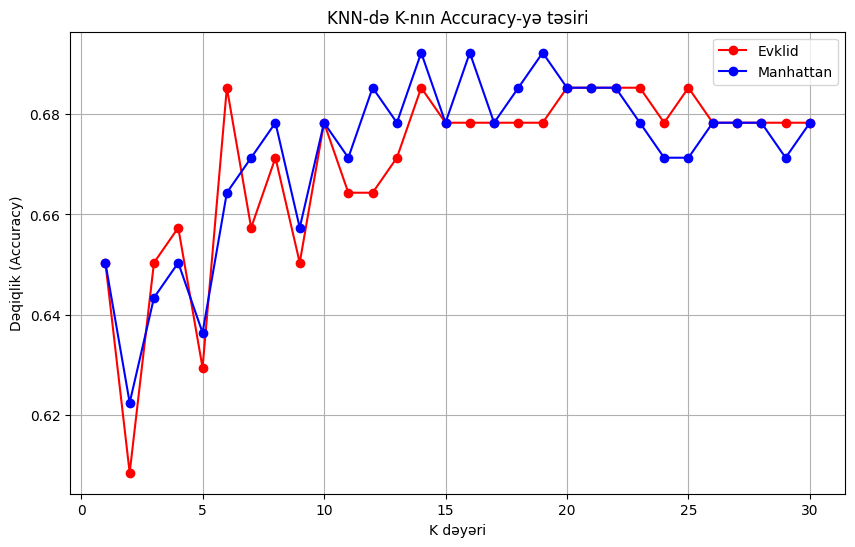

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, euclidean_scores, 'ro-', label='Evklid')
plt.plot(k_values, manhattan_scores, 'bo-', label='Manhattan')
plt.xlabel('K dəyəri')
plt.ylabel('Dəqiqlik (Accuracy)')
plt.title('KNN-də K-nın Accuracy-yə təsiri')
plt.legend()
plt.grid()
plt.show()

# SVM

In [14]:
C_values = [0.01, 0.1, 1, 10, 100]
best_C = None
best_accuracy = 0
svm_scores = []

for C in C_values:
    svm_model = SVC(C=C, kernel='rbf', random_state=42)
    svm_model.fit(x_train, y_train)
    y_pred_svm = svm_model.predict(x_test)
    acc = accuracy_score(y_test, y_pred_svm)
    svm_scores.append(acc)
    print(f"C={C}, Accuracy={acc}")
    
    if acc > best_accuracy:
        best_accuracy = acc
        best_C = C

print(f"Ən yaxşı C dəyəri: {best_C} ilə Accuracy: {best_accuracy}")

C=0.01, Accuracy=0.6083916083916084
C=0.1, Accuracy=0.6643356643356644
C=1, Accuracy=0.6783216783216783
C=10, Accuracy=0.6783216783216783
C=100, Accuracy=0.6923076923076923
Ən yaxşı C dəyəri: 100 ilə Accuracy: 0.6923076923076923


In [15]:
final_svm_model = SVC(C=best_C, kernel='rbf', random_state=42)
final_svm_model.fit(x_train, y_train)
y_final_pred = final_svm_model.predict(x_test)
final_accuracy = accuracy_score(y_test, y_final_pred)
print(f"Final modelin test datası üzərində Accuracy nəticəsi: {final_accuracy}")


Final modelin test datası üzərində Accuracy nəticəsi: 0.6923076923076923


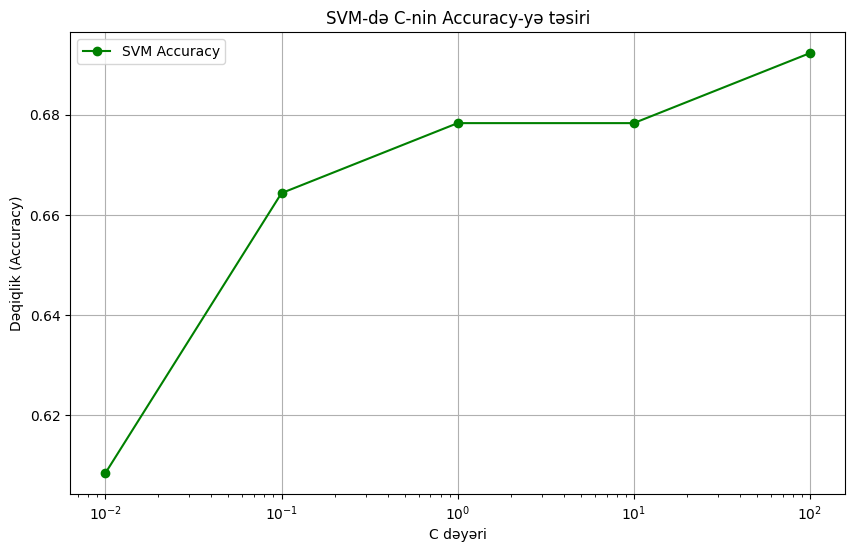

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(C_values, svm_scores, 'go-', label='SVM Accuracy')
plt.xscale('log')
plt.xlabel('C dəyəri')
plt.ylabel('Dəqiqlik (Accuracy)')
plt.title('SVM-də C-nin Accuracy-yə təsiri')
plt.legend()
plt.grid()
plt.show()


# DECISION TREE

In [17]:
max_depth_values = range(1, 21)
dt_scores = []
best_depth = None
best_dt_accuracy = 0

for depth in max_depth_values:
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_model.fit(x_train, y_train)
    y_pred_dt = dt_model.predict(x_test)
    acc = accuracy_score(y_test, y_pred_dt)
    dt_scores.append(acc)
    
    if acc > best_dt_accuracy:
        best_dt_accuracy = acc
        best_depth = depth

print(f"Ən yaxşı max_depth: {best_depth} ilə Accuracy: {best_dt_accuracy}")


Ən yaxşı max_depth: 11 ilə Accuracy: 0.7062937062937062


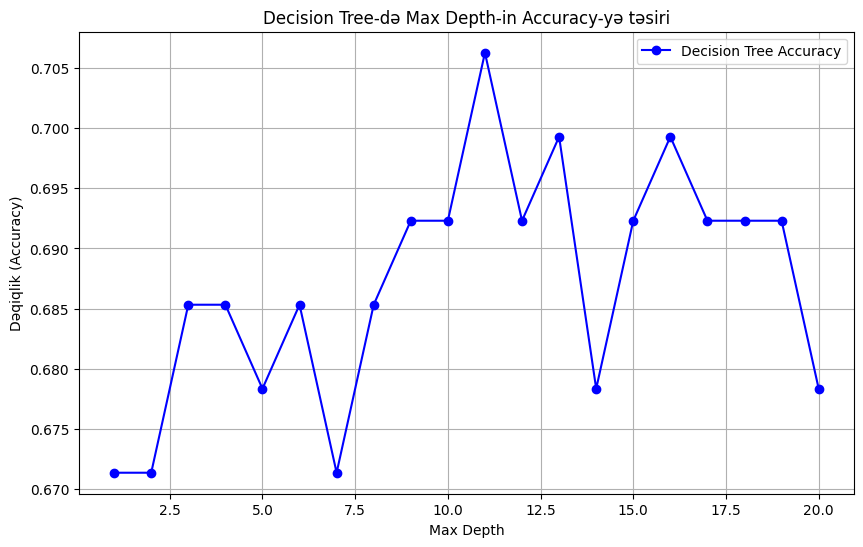

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, dt_scores, 'bo-', label='Decision Tree Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Dəqiqlik (Accuracy)')
plt.title('Decision Tree-də Max Depth-in Accuracy-yə təsiri')
plt.legend()
plt.grid()
plt.show()

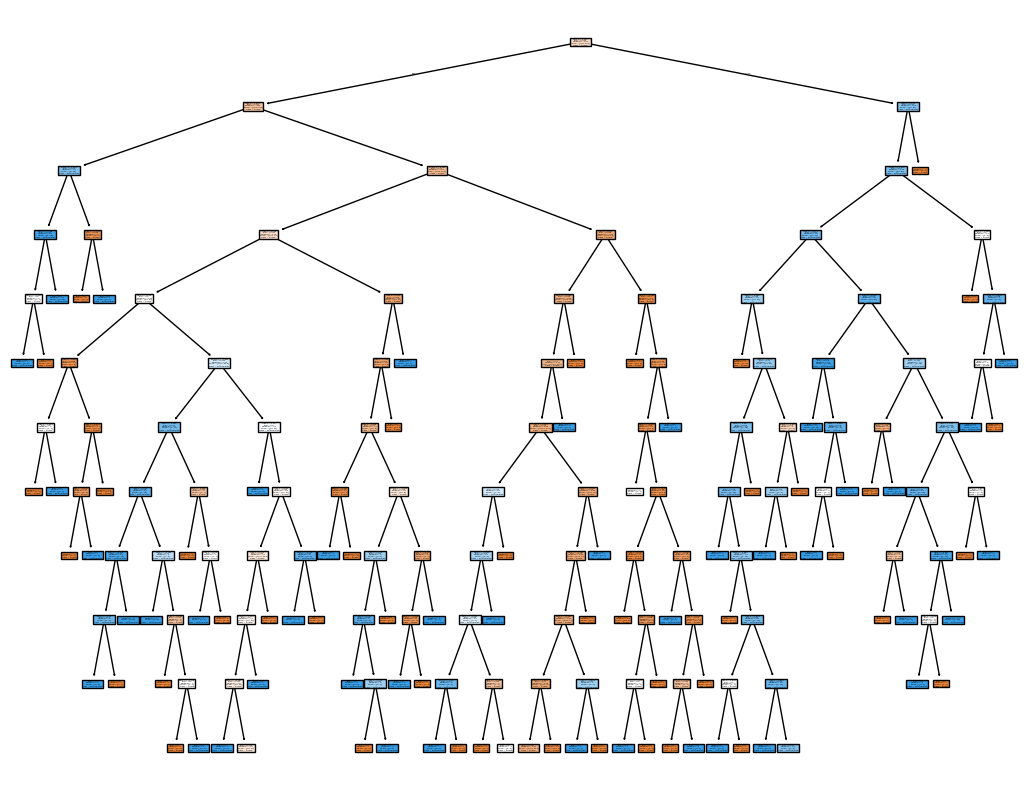

In [20]:
final_dt_model = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
final_dt_model.fit(x_train, y_train)

plt.figure(figsize=(13,10))  # Qrafik ölçüsünü artırırıq
plot_tree(final_dt_model, feature_names=attributes, class_names=['Ölmək', 'Sağ Qalmaq'], filled=True)
plt.show()

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

df = sns.load_dataset("penguins")
df.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


In [47]:
attributes2 = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g", "species"]
df = df[attributes2]
df = df.rename(columns={
    "bill_length_mm": "cana uzunluğu (mm)",
    "bill_depth_mm": "cana dərinliyi (mm)",
    "flipper_length_mm": "qanad uzunluğu (mm)",
    "body_mass_g": "bədən kütləsi (g)",
    "species": "növ"
})
df = df.dropna()

In [48]:
le = LabelEncoder()
df["növ"] = le.fit_transform(df["növ"])

In [49]:
df.head(3)

,cana uzunluğu (mm),cana dərinliyi (mm),qanad uzunluğu (mm),bədən kütləsi (g),növ
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0


In [50]:
attributes2 = ["cana uzunluğu (mm)", "cana dərinliyi (mm)", "qanad uzunluğu (mm)", "bədən kütləsi (g)"]

x = df[attributes2]

y = df["növ"]


In [51]:
df.head(3)

,cana uzunluğu (mm),cana dərinliyi (mm),qanad uzunluğu (mm),bədən kütləsi (g),növ
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0


In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [53]:
# Məlumatları standartlaşdırırıq
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# KNN

In [54]:
k_values = range(1, 20)
euclidean_scores = []
manhattan_scores = []

In [55]:

for k in k_values:
    knn_euclidean = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn_euclidean.fit(x_train, y_train)
    y_pred_euclidean = knn_euclidean.predict(x_test)
    euclidean_scores.append(accuracy_score(y_test, y_pred_euclidean))
    
    knn_manhattan = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn_manhattan.fit(x_train, y_train)
    y_pred_manhattan = knn_manhattan.predict(x_test)
    manhattan_scores.append(accuracy_score(y_test, y_pred_manhattan))

In [56]:
print("Evklid məsafəsi:",euclidean_scores)
print("\n")
print("Manhattan məsafəsi:",manhattan_scores)

Evklid məsafəsi: [0.9710144927536232, 0.9710144927536232, 0.9855072463768116, 0.9855072463768116, 0.9855072463768116, 1.0, 1.0, 0.9710144927536232, 0.9710144927536232, 0.9710144927536232, 0.9565217391304348, 0.9565217391304348, 0.9565217391304348, 0.9710144927536232, 0.9565217391304348, 0.9565217391304348, 0.9565217391304348, 0.9565217391304348, 0.9565217391304348]


Manhattan məsafəsi: [0.9855072463768116, 0.9710144927536232, 0.9855072463768116, 1.0, 1.0, 1.0, 1.0, 0.9710144927536232, 0.9565217391304348, 0.9710144927536232, 0.9565217391304348, 0.9565217391304348, 0.9565217391304348, 0.9565217391304348, 0.9565217391304348, 0.9565217391304348, 0.9565217391304348, 0.9565217391304348, 0.9565217391304348]


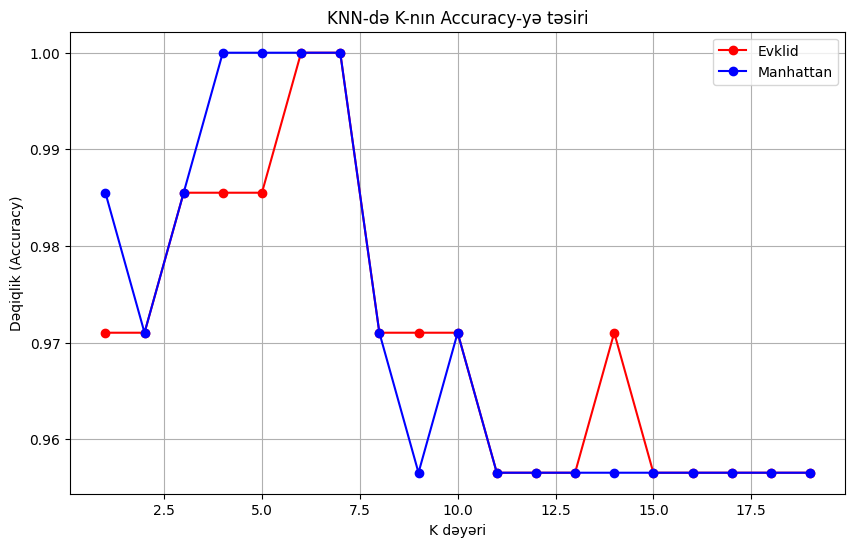

In [57]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, euclidean_scores, 'ro-', label='Evklid')
plt.plot(k_values, manhattan_scores, 'bo-', label='Manhattan')
plt.xlabel('K dəyəri')
plt.ylabel('Dəqiqlik (Accuracy)')
plt.title('KNN-də K-nın Accuracy-yə təsiri')
plt.legend()
plt.grid()
plt.show()

# SVM

In [58]:
C_values = [0.01, 0.1, 1, 10, 100]
best_C = None
best_accuracy = 0
svm_scores = []

In [59]:
for C in C_values:
    svm_model = SVC(C=C, kernel='rbf', random_state=42)
    svm_model.fit(x_train, y_train)
    y_pred_svm = svm_model.predict(x_test)
    acc = accuracy_score(y_test, y_pred_svm)
    svm_scores.append(acc)
    
    if acc > best_accuracy:
        best_accuracy = acc
        best_C = C

In [60]:
final_svm_model = SVC(C=best_C, kernel='rbf', random_state=42)
final_svm_model.fit(x_train, y_train)
y_final_pred = final_svm_model.predict(x_test)
final_accuracy = accuracy_score(y_test, y_final_pred)
print(f"Final SVM modelinin test accuracy nəticəsi: {final_accuracy}")

Final SVM modelinin test accuracy nəticəsi: 0.9855072463768116


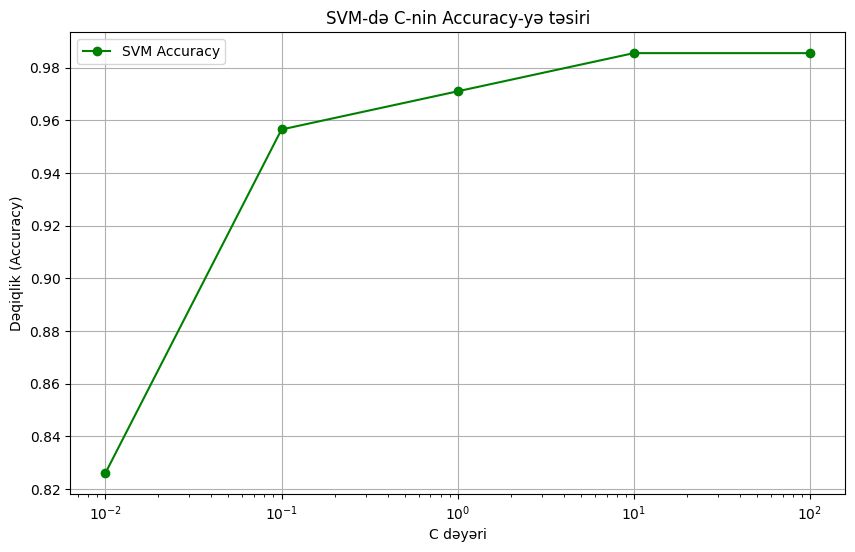

In [61]:
plt.figure(figsize=(10, 6))
plt.plot(C_values, svm_scores, 'go-', label='SVM Accuracy')
plt.xscale('log')
plt.xlabel('C dəyəri')
plt.ylabel('Dəqiqlik (Accuracy)')
plt.title('SVM-də C-nin Accuracy-yə təsiri')
plt.legend()
plt.grid()
plt.show()

# DECISION TREE

In [62]:
max_depth_values = range(1, 21)
dt_scores = []
best_depth = None
best_dt_accuracy = 0

In [63]:
for depth in max_depth_values:
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_model.fit(x_train, y_train)
    y_pred_dt = dt_model.predict(x_test)
    acc = accuracy_score(y_test, y_pred_dt)
    dt_scores.append(acc)
    
    if acc > best_dt_accuracy:
        best_dt_accuracy = acc
        best_depth = depth

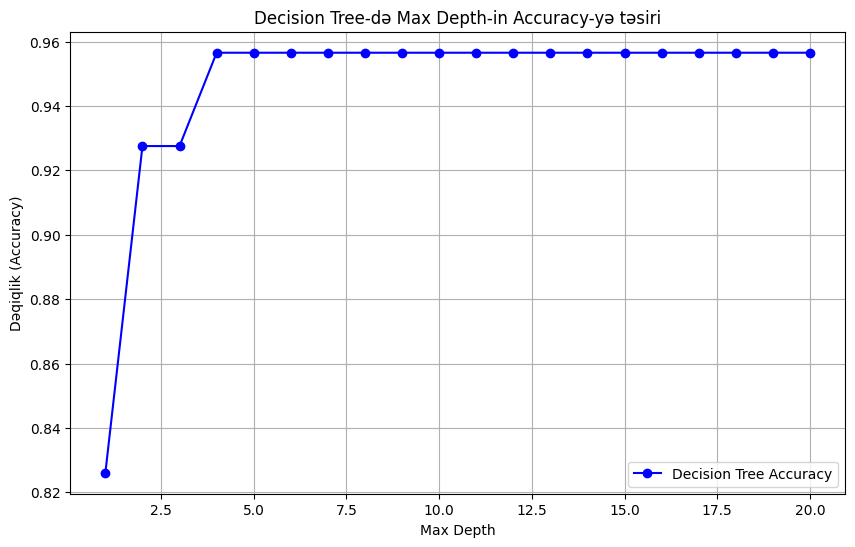

In [64]:
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, dt_scores, 'bo-', label='Decision Tree Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Dəqiqlik (Accuracy)')
plt.title('Decision Tree-də Max Depth-in Accuracy-yə təsiri')
plt.legend()
plt.grid()
plt.show()

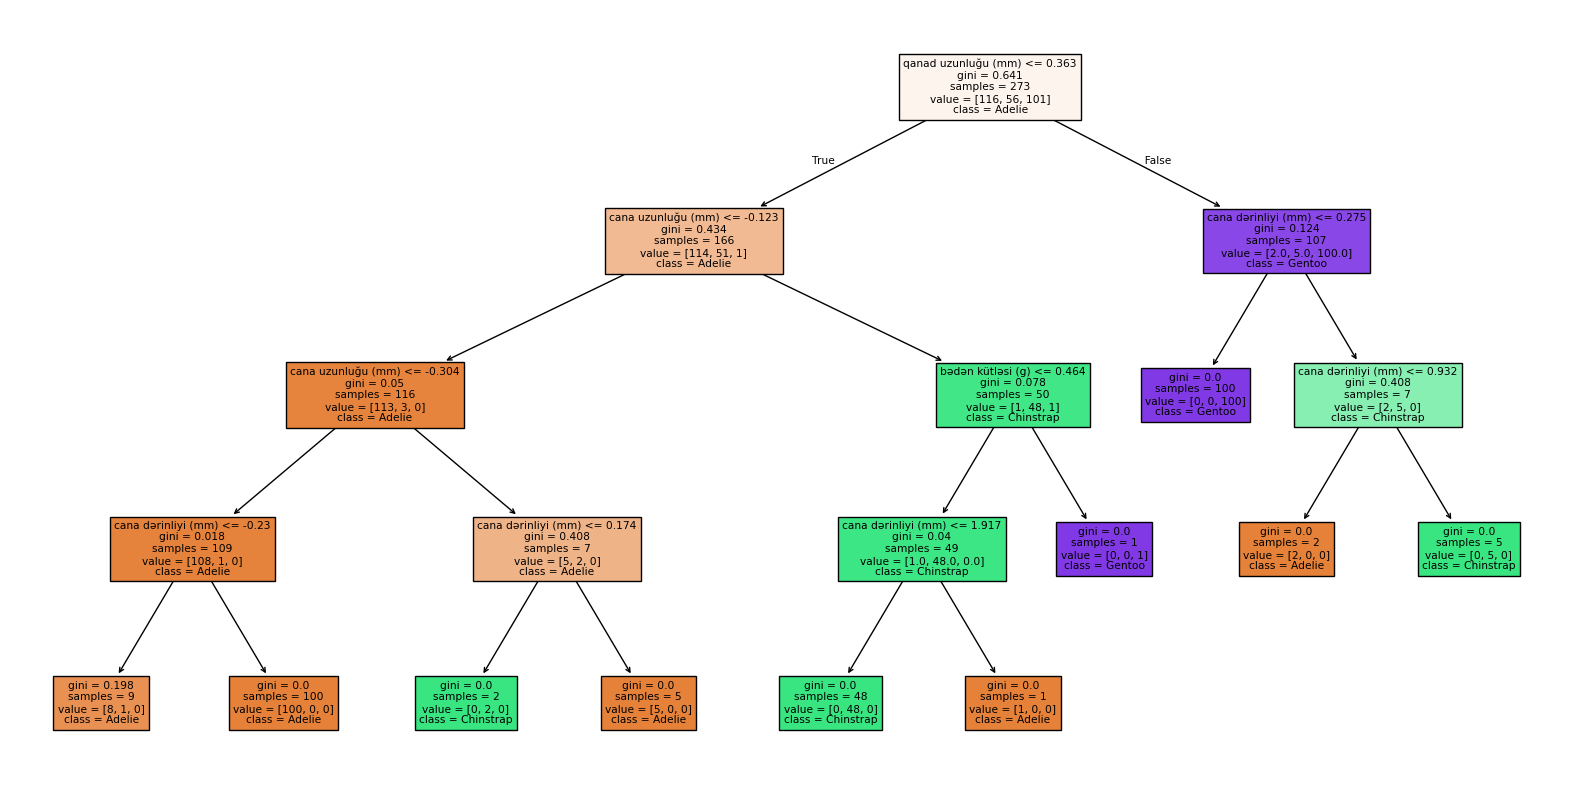

Final Decision Tree modelinin test accuracy nəticəsi: 0.9565217391304348


In [65]:
final_dt_model = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
final_dt_model.fit(x_train, y_train)
plt.figure(figsize=(20, 10))
plot_tree(final_dt_model, feature_names=attributes2, class_names=le.classes_, filled=True)
plt.show()

y_final_dt_pred = final_dt_model.predict(x_test)
final_dt_accuracy = accuracy_score(y_test, y_final_dt_pred)
print(f"Final Decision Tree modelinin test accuracy nəticəsi: {final_dt_accuracy}")


# Pinqvin datasinda KNN =1, SVM=0.98, DECISION TREE=0.95 olur